In [2]:
import numpy as np
import matplotlib
import sklearn.datasets
import sklearn.model_selection
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import random

from datetime import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
random.seed(datetime.now())

mnist = sklearn.datasets.fetch_openml('mnist_784')


/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype float128 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype float128 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/matplotlib/image.py:369: UserWarning: Casting input data from 'float128' to 'float64'for imshow
  "for imshow".format(A.dtype))


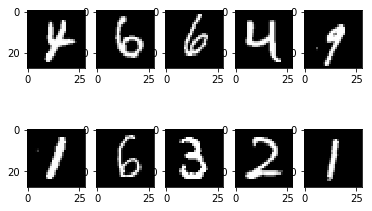

In [14]:
 #Visualising data

Xraw = mnist.data.astype('float128')
yraw = mnist.target.astype('int64')

X_train, X_test, y_train, y_test = train_test_split(Xraw, yraw, test_size=0.25, random_state=42)

X_train = (X_train.T/255)
X_test = (X_test.T/255)
y_train_raw = (y_train.reshape(1,-1))
y_test_raw = (y_test.reshape(1,-1))


Y_train = np.zeros((10, y_train_raw.shape[1]))
Y_test = np.zeros((10, y_test_raw.shape[1]))


for i,j in enumerate(y_train_raw.T):
  Y_train[j,i]=1
for i,j in enumerate(y_test_raw.T):
  Y_test[j,i]=1

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

for i in range(10):
  temp = random.randint(0, mnist.data.shape[1])
  plt.subplot(2,5,i+1)
  plt.imshow((X_train.T)[temp].reshape(28,28), cmap = 'gray')
  
plt.show()

In [54]:
def sigmoid(x):
  return 1/(1+np.e ** -x)

def derive(x,act):
  if act == "RELU":
    a = np.multiply((x > 0),x)
    return a
  if act == "SIGMOID":
    return np.multiply(x,(1-x))

def forwardProp(W,X,layers):
    
  cache = {}
  W1 = W[0]
  W2 = W[1]
  b1 = W[2]
  b2 = W[3]
  
  #Layer 1
  z1 = (np.dot(W1, X)) + b1
  a1 = np.multiply(z1,(z1 > 0)).astype('float32')
  
  #Layer 2
  z2 = (np.dot(W2, a1)).astype('float32') + b2
  a2 = sigmoid(z2).astype('float32')
  
  cach = {"a1" : a1, "b1":b1, "z1":z1, "b2":b2, "a2":a2, "z2":z2}
  return cach
    
def cost(AL,Y,m):
  cost = -1/m*np.sum((np.multiply(Y,np.log(AL))+np.multiply(1-Y,np.log(1-AL))))
  return cost

def backProp(cache, y, X, W, alpha=0.1,m = 70000):
  W1 = W[0]
  W2 = W[1]
  b1 = W[2]
  b2 = W[3]
  
  dz2 = cache["a2"]- y
  dw2 = 1/m*np.dot(dz2, cache["a1"].T)
  db2 = 1/m*np.sum(dz2, axis = 1, keepdims = True)
  
  dz1 = np.dot(W2.T,dz2)
  dz1 = np.multiply(dz1, derive(cache["z1"], "RELU"))
  
  dw1 = 1/m*(np.dot(dz1,X.T))
  db1 = 1/m*np.sum(dz1, axis = 1, keepdims = True)
  
  W2 = W2 - alpha*dw2
  W1 = W1 - alpha*dw1
  
  b1 = b1 - alpha*db1
  b2 = b2 - alpha*db2

  W = [W1, W2, b1, b2]
  return W

[[2.31598466e-04 2.65128715e-05 3.47865679e-04 ... 2.78397223e-04
  3.82775255e-05 1.34692729e-05]
 [2.02045330e-05 2.27844778e-04 9.58200610e-05 ... 3.02409529e-04
  2.63449822e-04 2.55424756e-04]
 [1.95243489e-04 8.12258141e-05 8.96973184e-05 ... 2.97362678e-04
  8.50211996e-05 3.04920076e-04]
 ...
 [3.55352332e-05 2.70804808e-04 2.70384311e-04 ... 2.79338279e-06
  2.91022530e-04 1.30965508e-04]
 [1.24852543e-04 1.09135423e-04 3.27088176e-04 ... 2.95973412e-04
  2.64694198e-04 3.53758167e-05]
 [2.05614106e-04 1.12602891e-04 1.60283088e-04 ... 1.13308949e-04
  9.90604295e-05 6.74620571e-05]]


6.931573322750273


3.2420829502091517


2.6310848112752105


/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


nan


2.879645991068759


2.8710758124424487


2.870767705742008


2.869319655330245


2.873749546746388


2.871129863548923


2.8708366895353246


nan


nan


nan


nan


nan


nan


nan


nan


nan


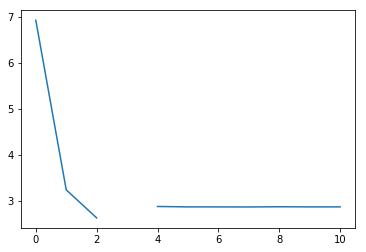

In [101]:
layers = [784,20,10]
costarr = []
W1 = np.random.rand(layers[1], layers[0])*np.sqrt(1/layers[0])*0.01
W2 = np.random.rand(layers[2], layers[1])*np.sqrt(1/layers[1])*0.01
b1 = np.zeros((layers[1],1)).astype('float32')
b2 = np.zeros((layers[2],1)).astype('float32')
print(W1)
W = [W1,W2,b1,b2]  
m = X_train_scaled.shape[1]
for i in range(2000):
    cache = forwardProp(W,X_train_scaled, layers)
    W = backProp(cache, Y_train,X_train_scaled, W, 0.3,m)
    if(i%100 == 0):
        a = cost(cache["a2"], Y_train, m)
        print(a)
        costarr.append(a)

plt.plot(costarr)
plt.show()

In [86]:
print(W[0])
def predict(xin,W, layers):
  cache = forwardProp(W,xin, layers)
  return cache["a2"]

def predict_test(xin,y, W, layers):
  op = predict(xin, W, layers)
  op = (op==np.max(op, axis = 0))
  print(op)
  wrong = np.sum(np.abs(op - y), axis = 0)
  acc = np.sum(wrong == 0)/xin.shape[1]*100
  return acc

[[ 1.74935726e-04  1.20972772e-04  3.25807886e-04 ...  3.82929137e-05
   3.10510961e-04  7.46643825e-05]
 [ 2.03479759e-04  3.21355424e-04  7.33526975e-05 ...  3.07672735e-04
   9.10820234e-05  2.18780227e-04]
 [ 2.32426162e-04  2.66045897e-04  2.81934967e-04 ...  2.99649589e-04
   2.99226124e-04  1.23778178e-04]
 ...
 [ 1.67546021e-01  1.67476575e-01  1.67420789e-01 ...  1.67637524e-01
   1.67454399e-01  1.67558854e-01]
 [ 2.08504348e-04 -1.05300113e-05  5.36837805e-05 ...  2.23784287e-04
  -6.13752507e-06  1.58440657e-05]
 [ 1.76607744e-05  1.39766162e-04  3.34571512e-04 ...  1.73414223e-04
   5.93297875e-05  2.08270726e-04]]


/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/matplotlib/image.py:369: UserWarning: Casting input data from 'float128' to 'float64'for imshow
  "for imshow".format(A.dtype))


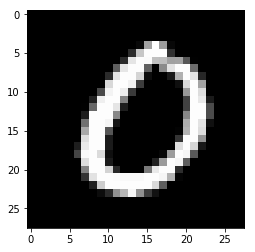

0
[[False False False ... False False False]
 [ True  True  True ...  True  True  True]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
21.165714285714284


In [ ]:
num = 7999
plt.imshow((X_train.T)[num].reshape(28,28), cmap = 'gray')
plt.show()
cache = predict((X_train.T)[num].reshape(-1,1), W, layers)

print(np.argmax(cache))

acc = predict_test(X_test_scaled, Y_test, W, layers)
print(acc)